In [422]:
import polars as pl
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Первичная обработка данных

In [423]:
df = pl.read_excel("./data/24MAG_HW_1_v14.xls", has_header=False)
df = df.rename(
    dict(
        zip(
            [f"column_{i}" for i in range(1, 7)],
            [
                "age",
                "num_dependants",
                "income",
                "years_in_region",
                "car_value",
                "credit_value",
            ],
        )
    )
)
df

age,num_dependants,income,years_in_region,car_value,credit_value
i64,i64,i64,i64,i64,i64
37,2,29900,7,30000,297000
29,0,1500,5,0,4000
33,2,25200,6,null,248000
28,1,24900,3,24000,241000
47,2,8800,15,9000,92000
…,…,…,…,…,…
19,2,8000,12,50000,200000
40,2,14500,10,14000,144000
null,2,12600,15,13000,130000


In [424]:
df.describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value
str,f64,f64,f64,f64,f64,f64
"""count""",49.0,49.0,49.0,50.0,50.0,50.0
"""null_count""",3.0,3.0,3.0,2.0,2.0,2.0
"""mean""",38.632653,1.979592,19808.163265,10.12,20920.0,200586.0
"""std""",8.661923,0.989314,10269.490346,4.930703,11527.854465,99386.004866
"""min""",19.0,0.0,1500.0,0.0,0.0,4000.0
"""25%""",33.0,1.0,12100.0,6.0,13000.0,128000.0
"""50%""",39.0,2.0,16800.0,11.0,19000.0,200000.0
"""75%""",46.0,3.0,29200.0,14.0,30000.0,293000.0
"""max""",56.0,4.0,43300.0,19.0,50000.0,437000.0


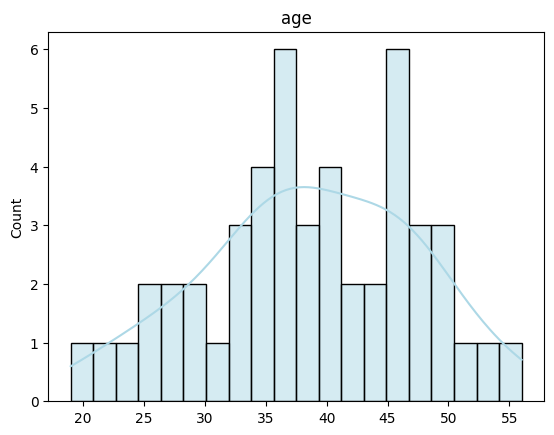

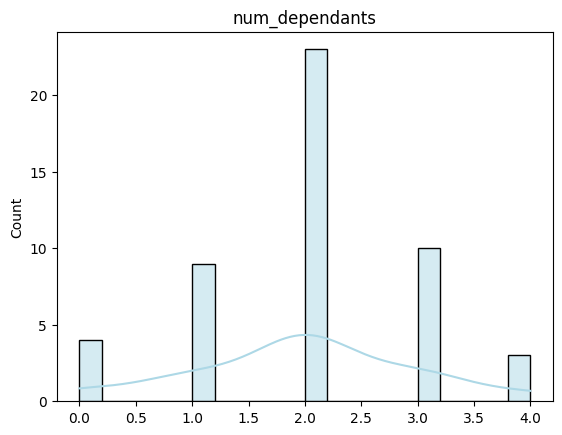

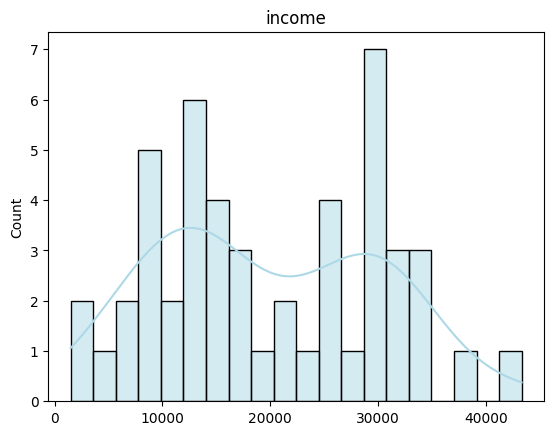

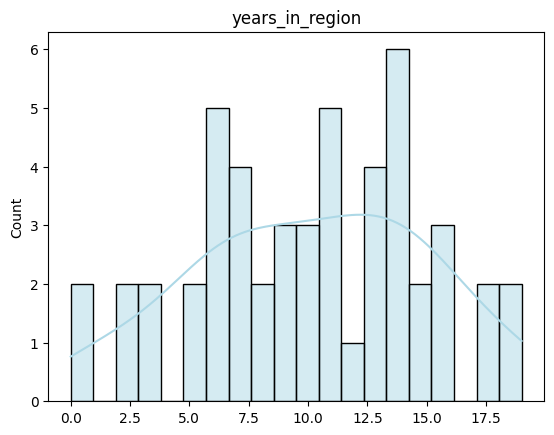

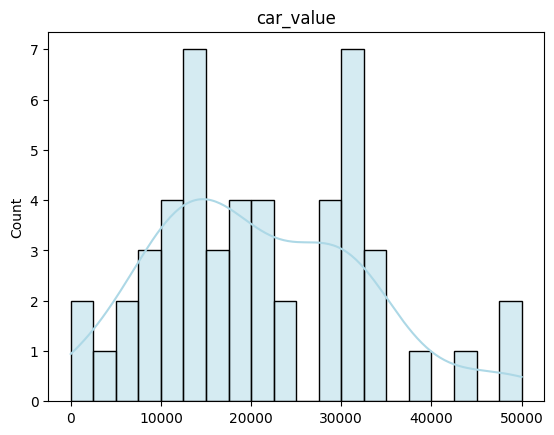

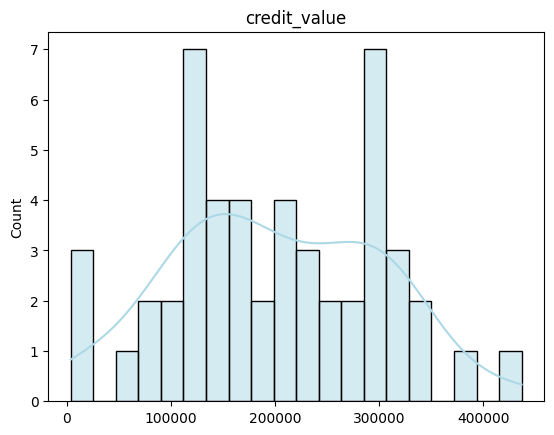

In [425]:
for col_name in df.columns:
    sns.histplot(df[col_name], bins=20, kde=True, color="lightblue", edgecolor="black")
    plt.title(col_name)
    plt.show()

In [426]:
df = df.fill_null(strategy="mean")

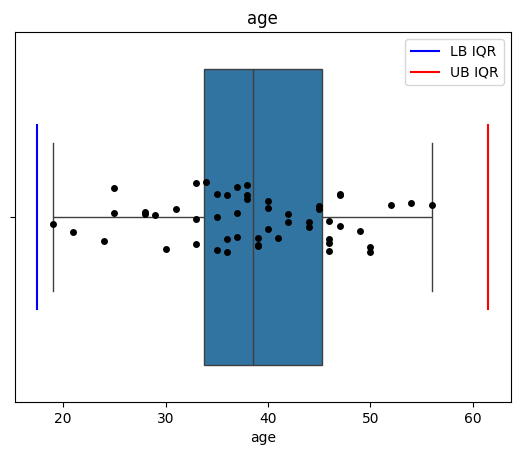

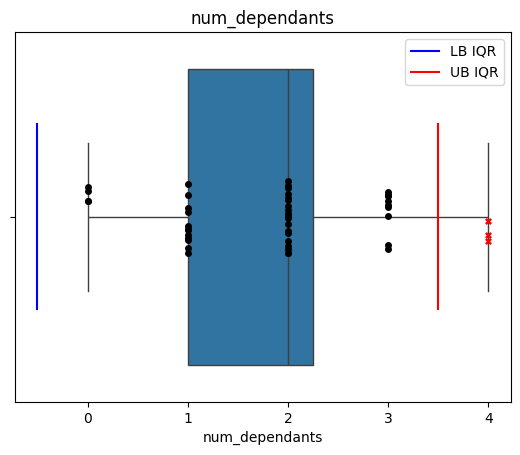

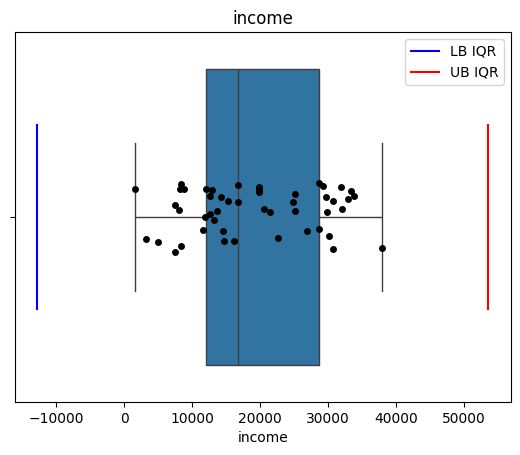

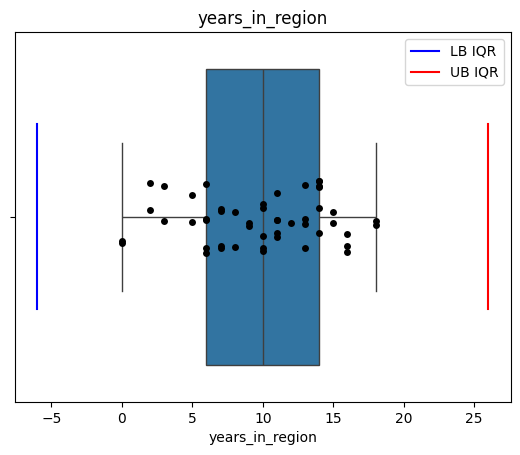

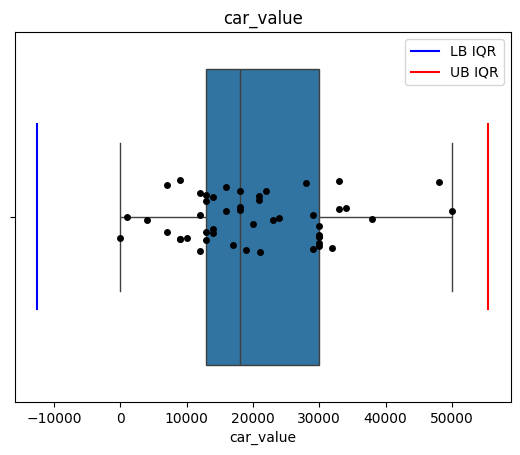

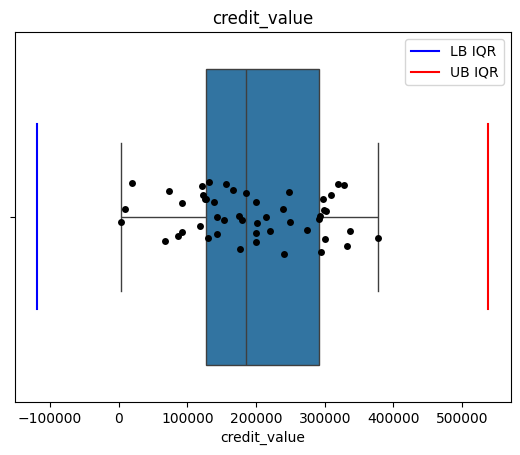

In [427]:
df_orig_size = len(df)

for col_name in df.columns:

    plt.title(col_name)
    sns.boxplot(x=df[col_name])

    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    plt.axvline(lower_bound, ymin=0.25, ymax=0.75, color="b", label="LB IQR")
    plt.axvline(upper_bound, ymin=0.25, ymax=0.75, color="r", label="UB IQR")

    sns.stripplot(
        x=df.filter(
            (pl.col(col_name) >= lower_bound) & (pl.col(col_name) <= upper_bound)
        )[col_name],
        color="black",
    )
    sns.stripplot(
        x=df.filter((pl.col(col_name) < lower_bound))[col_name],
        color="blue",
        marker="X",
    )
    sns.stripplot(
        x=df.filter((pl.col(col_name) > upper_bound))[col_name], color="red", marker="X"
    )

    plt.legend()
    plt.show()

    df = df.filter(
        (pl.col(col_name) >= lower_bound) & (pl.col(col_name) <= upper_bound)
    )

In [428]:
df.describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value
str,f64,f64,f64,f64,f64,f64
"""count""",49.0,49.0,49.0,49.0,49.0,49.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",38.183673,1.795918,19208.653061,9.77551,20282.44898,194172.897959
"""std""",8.265575,0.865534,9639.637488,4.624506,11094.089742,93701.807169
"""min""",19.0,0.0,1500.0,0.0,0.0,4000.0
"""25%""",33.0,1.0,12100.0,6.0,13000.0,128000.0
"""50%""",38.0,2.0,16800.0,10.0,18000.0,186000.0
"""75%""",45.0,2.0,28700.0,14.0,30000.0,292000.0
"""max""",54.0,3.0,38000.0,18.0,50000.0,377000.0


# 2. Снижение размерности. Метод PCA 

Центрирование и нормировка

In [429]:
for col_name in df.columns:
    df = df.with_columns((pl.col(col_name) - df[col_name].mean()).alias(col_name))
    df = df.with_columns(
        (pl.col(col_name) / np.linalg.norm(df[col_name].to_numpy())).alias(col_name)
    )

In [430]:
df.describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value
str,f64,f64,f64,f64,f64,f64
"""count""",49.0,49.0,49.0,49.0,49.0,49.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",-8.2700e-17,-1.0196e-17,2.2658e-18,0.0,6.7973e-18,4.5315e-18
"""std""",0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
"""min""",-0.334995,-0.29949,-0.265158,-0.305108,-0.263881,-0.292941
"""25%""",-0.09052,-0.132728,-0.10644,-0.117839,-0.094747,-0.101932
"""50%""",-0.003207,0.034033,-0.036066,0.007007,-0.029695,-0.012589
"""75%""",0.11903,0.034033,0.142117,0.131852,0.126428,0.150692
"""max""",0.276193,0.200794,0.281369,0.256698,0.386635,0.281626


Найдем SVD разложение

In [431]:
Z = df.to_numpy()

In [432]:
U, S, VT = np.linalg.svd(df.to_numpy())

Найдем ошибки аппроксимации в спектральной норме и в норме Фробениуса и построим их графики зависимости от количества сингулярных чисел

In [433]:
frobenius_errors = []
spectral_errors = []
explained_vars = []

for i in range(len(S)):
    S_n = S.copy()
    S_n = S_n[: i + 1]

    S_n_padded = np.concatenate(
        [np.diag(S_n), np.zeros([U.shape[0] - (i + 1), i + 1])], axis=0
    )

    Z_approx = U @ S_n_padded @ VT[: i + 1, ...]

    frobenius_errors.append(np.linalg.norm(Z - Z_approx, ord="fro"))
    spectral_errors.append(np.linalg.norm(Z - Z_approx, ord=2))
    explained_vars.append(sum(S_n**2) / sum(S**2))

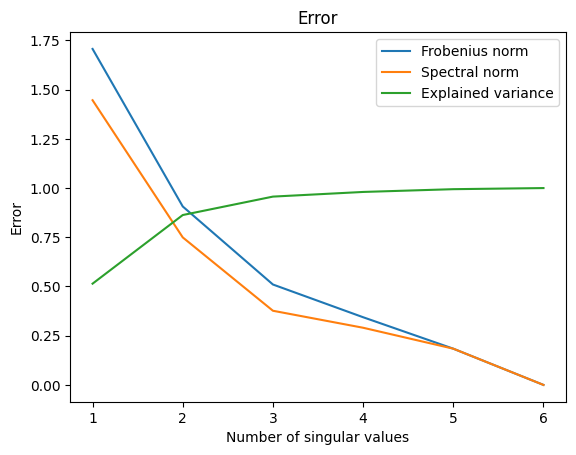

In [434]:
plt.plot(range(1, len(frobenius_errors) + 1), frobenius_errors, label="Frobenius norm")
plt.plot(range(1, len(spectral_errors) + 1), spectral_errors, label="Spectral norm")
plt.plot(range(1, len(explained_vars) + 1), explained_vars, label="Explained variance")
plt.title("Error")
plt.xlabel("Number of singular values")
plt.ylabel("Error")
plt.legend()

По графику ***Объясненной Дисперсии*** можно сделать вывод, что хватит 2 фактора.

In [435]:
SUFF_K = 2

In [436]:
S_n = S.copy()
S_n = S_n[:SUFF_K]

S_n = np.concatenate([np.diag(S_n), np.zeros([U.shape[0] - SUFF_K, SUFF_K])], axis=0)

Z_k = U @ S_n

In [437]:
Z_k.shape

(49, 2)

In [438]:
df_with_factors = pl.DataFrame(
    {f"factor_{i+1}": Z_k[:, i] for i in range(Z_k.shape[1])}
)

In [439]:
df_with_factors

factor_1,factor_2
f64,f64
-0.252495,0.101062
0.23784,-0.551534
-0.167741,-0.016768
-0.266429,-0.191635
0.347484,0.026727
…,…
-0.191044,-0.019831
0.126289,-0.025847
0.210484,0.005151


In [440]:
df_with_factors.describe()

statistic,factor_1,factor_2
str,f64,f64
"""count""",49.0,49.0
"""null_count""",0.0,0.0
"""mean""",1.1329e-17,1.2462e-17
"""std""",0.253583,0.208748
"""min""",-0.470123,-0.603001
"""25%""",-0.235553,-0.105002
"""50%""",0.104046,0.016406
"""75%""",0.210484,0.119644
"""max""",0.432532,0.327887


/home/igkh/.local/lib/python3.10/site-packages/seaborn/_core/data.py:275: UserWarning: DataFrame interchange with pandas<2.0.2 has some known issues. You are using pandas 1.5.3. Continuing, but it is recommended to carefully inspect the results and to consider upgrading.
  data = convert_dataframe_to_pandas(data)
/tmp/ipykernel_774/2104526814.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_with_factors, x="factor_1", y="factor_2", palette="deep")


<Axes: xlabel='factor_1', ylabel='factor_2'>

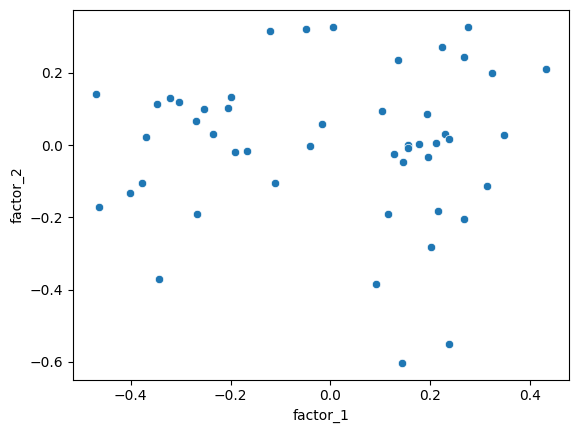

In [441]:
sns.scatterplot(data=df_with_factors, x="factor_1", y="factor_2", palette="deep")

# 3. Вложение MDS.

Матрица расстояний

In [442]:
from scipy.spatial import distance_matrix

In [443]:
D_matrix = np.vstack(distance_matrix(*[df.to_numpy()] * 2))

In [444]:
D_matrix.shape

(49, 49)

In [445]:
S_matrix = (
    -0.5
    * (np.eye(D_matrix.shape[0]) - np.ones(D_matrix.shape) / D_matrix.shape[0])
    @ D_matrix
    @ (np.eye(D_matrix.shape[0]) - np.ones(D_matrix.shape) / D_matrix.shape[0])
)

Проверка симметричности

In [446]:
EPS = 1e-15

In [447]:
np.all(np.abs(S_matrix - S_matrix.T) < EPS)

True

Проверка неотрицательной определенности

In [448]:
np.all(np.linalg.eigvals(S_matrix) > 0)

True

--> Матрица расстояний соответствует необходимым условиям для точного вложения.

In [449]:
K_DIMS = 2

In [450]:
k_eig_vals, k_eig_veks = np.linalg.eig(S_matrix)

In [451]:
S_matrix_approx = (k_eig_veks * k_eig_vals**0.5)[:, :K_DIMS] @ (
    k_eig_veks * k_eig_vals**0.5
)[:, :K_DIMS].T

In [452]:
S_matrix_approx.shape

(49, 49)

In [453]:
print(np.linalg.norm(S_matrix - S_matrix_approx, ord="fro"))
print(np.linalg.norm(S_matrix - S_matrix_approx, ord=2))

1.3182813233592763
0.7626802319986787


In [454]:
np.all(np.abs(S_matrix_approx - S_matrix_approx.T) < EPS)

True

In [455]:
np.all(np.linalg.eigvals(S_matrix_approx) > 0)

False

--> Матрица не может быть точно вложена в 2-ух мерное пространство.

In [456]:
from sklearn.manifold import MDS

In [457]:
embedder = MDS(2, dissimilarity="precomputed")

In [458]:
k_dim_embeddings = embedder.fit_transform(D_matrix)

In [459]:
k_dim_embeddings.shape

(49, 2)

In [460]:
D_matrix_k_dim_embs = np.vstack(distance_matrix(*[k_dim_embeddings] * 2))

In [461]:
D_matrix_k_dim_embs.shape

(49, 49)

In [462]:
print(
    np.sqrt(sum(sum((D_matrix - D_matrix_k_dim_embs) ** 2)) / sum(sum((D_matrix) ** 2)))
)

0.1026442409594314


In [463]:
df_with_embs = pl.DataFrame(
    {f"dim_{i+1}": k_dim_embeddings[:, i] for i in range(k_dim_embeddings.shape[1])}
)

In [464]:
df_with_embs.describe()

statistic,dim_1,dim_2
str,f64,f64
"""count""",49.0,49.0
"""null_count""",0.0,0.0
"""mean""",2.3790e-17,0.0
"""std""",0.264802,0.231432
"""min""",-0.490683,-0.588475
"""25%""",-0.264002,-0.146965
"""50%""",0.100371,0.01012
"""75%""",0.227537,0.10328
"""max""",0.392219,0.454916


/home/igkh/.local/lib/python3.10/site-packages/seaborn/_core/data.py:275: UserWarning: DataFrame interchange with pandas<2.0.2 has some known issues. You are using pandas 1.5.3. Continuing, but it is recommended to carefully inspect the results and to consider upgrading.
  data = convert_dataframe_to_pandas(data)
/tmp/ipykernel_774/2737242698.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_with_embs, x="dim_1", y="dim_2", palette="deep")


<Axes: xlabel='dim_1', ylabel='dim_2'>

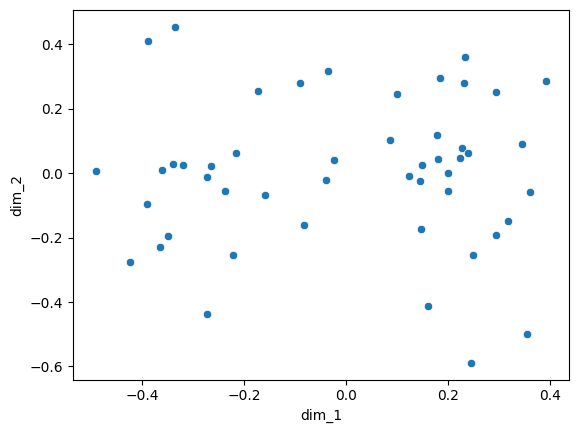

In [465]:
sns.scatterplot(data=df_with_embs, x="dim_1", y="dim_2", palette="deep")

Сравнение карт

In [466]:
df_with_embs_homogenic = df_with_embs.rename({"dim_1": "X", "dim_2": "Y"}).with_columns(
    pl.lit("MDS").alias("method")
)
df_with_factors_homogenic = df_with_factors.rename(
    {"factor_1": "X", "factor_2": "Y"}
).with_columns(pl.lit("SVD").alias("method"))

In [467]:
df_compl = pl.concat([df_with_embs_homogenic, df_with_factors_homogenic])

<Axes: xlabel='X', ylabel='Y'>

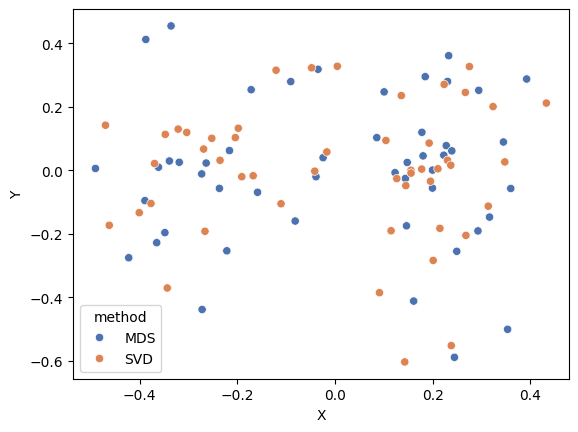

In [468]:
sns.scatterplot(data=df_compl.to_pandas(), x="X", y="Y", hue="method", palette="deep")